In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
df1 = pd.read_csv('Bangalore  house data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.isnull().sum

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df1.shape

(13320, 9)

In [383]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [24]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [26]:
df2 = df1.drop(['area_type','availability','society','balcony'], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [28]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [30]:
df2['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [32]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [48]:
df3['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [52]:
df3[df3['size'] > 20]


,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
4684,Munnekollal,43,2400,40.0,660.0


In [54]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [56]:
def float_ret(x):
    try:
        float(x)
    except:
        return False
    return True

In [60]:
df3[~df3['total_sqft'].apply(float_ret)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [62]:
def convert_sqrt_to_number(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [72]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_number)

In [76]:
df4.loc[30]

location      Yelahanka
size                  4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [78]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']

In [80]:
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [84]:
df5['location'] = df5['location'].apply(lambda x : x.strip())
location_stats = df5['location'].value_counts().sort_values(ascending = False)
location_stats

location
Whitefield                       535
Sarjapur  Road                   392
Electronic City                  304
Kanakpura Road                   266
Thanisandra                      236
                                ... 
Old Mangammanapalya Road           1
HAL Layout                         1
Gubbi Cross, Hennur Main Road      1
Jeevanhalli                        1
Abshot Layout                      1
Name: count, Length: 1293, dtype: int64

In [88]:
len(location_stats[location_stats <= 10])

1052

In [90]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [92]:
df5['location'] = df5['location'].apply(lambda x : 'others' if x in location_stats_less_than_10 else x)

In [98]:
# here check whether total_sqrt is correct for the given size of bedrooms. i.e; if there is 4 bedrooms nd sqrt given valid or not.  this 
#This can be find by total_sqrt / size < threshold (Analysis the data about particular threshold for the sqrt)

In [120]:
df5[ df5['total_sqft'] / df5['size'] < 300].head()

,location,size,total_sqft,bath,price,price_per_sqft,valid
9,others,6,1020.0,6.0,370.0,36274.509804,170.000000
45,HSR Layout,8,600.0,9.0,200.0,33333.333333,75.000000
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810,234.500000
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296,168.750000
70,others,3,500.0,3.0,100.0,20000.000000,166.666667


In [130]:
df6 = df5[~(df5['total_sqft'] / df5['size'] < 300)]

In [132]:
df6.shape


(12502, 7)

In [381]:
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft,valid
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606,528.0
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615,650.0
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556,480.0
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861,507.0
4,Kothanur,2,1200.0,2.0,51.00,4250.000000,600.0


In [134]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [159]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-s)) & (subdf.price_per_sqft < (m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.head()

,location,size,total_sqft,bath,price,price_per_sqft,valid
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860,712.500000
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491,543.333333
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333,625.000000
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333,400.000000
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668,617.500000


In [163]:
df7.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

In [171]:
df7.shape

(10241, 7)

In [175]:
#property prices for this dataset having 3 bedrooms 1210 sqft and price is 81lk and 3 bedrooms same sqft and price 102lk. These are outliers and these should eliminate
# here we need to check that mean, std, count of 1 bedroom should less than 2 bedroom.

In [179]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

Text(0, 0.5, 'Count')

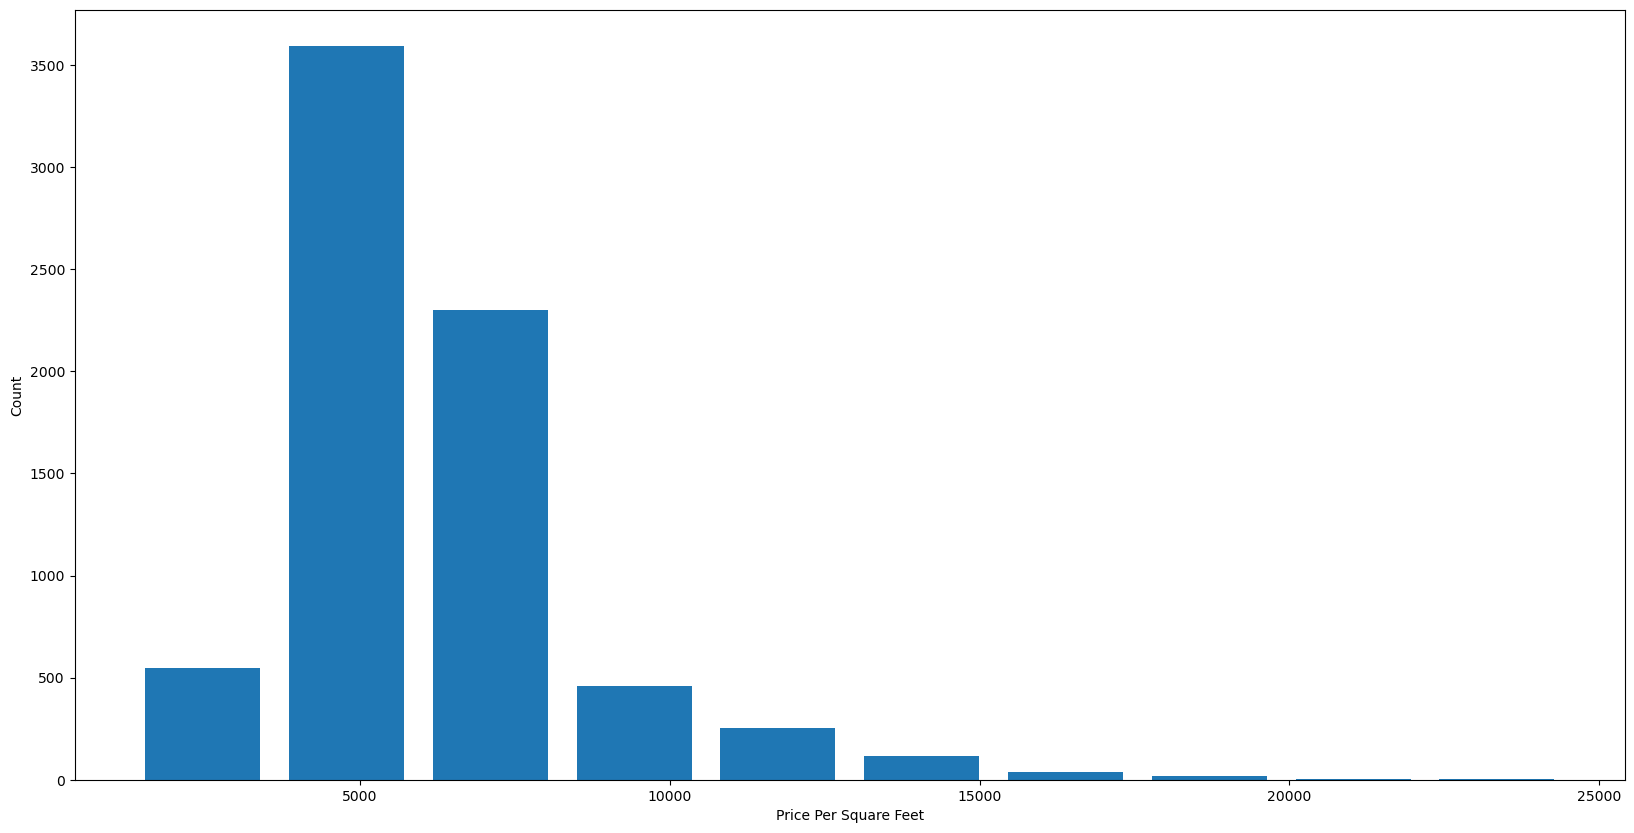

In [183]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [185]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

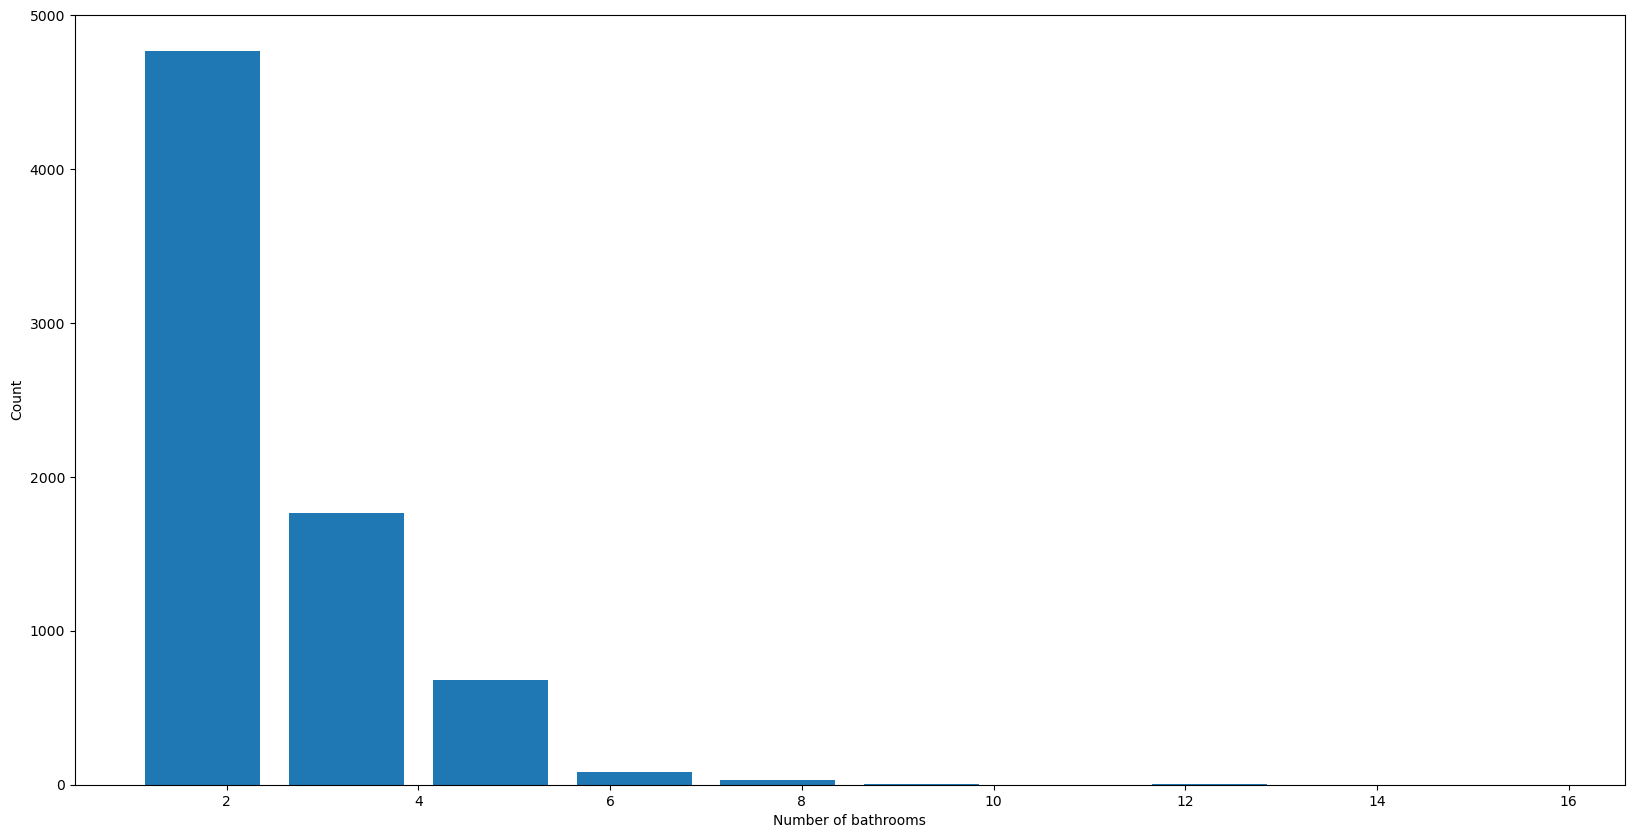

In [187]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [189]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft,valid
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000,400.000000
8486,others,10,12000.0,12.0,525.0,4375.000000,1200.000000
8575,others,16,10000.0,16.0,550.0,5500.000000,625.000000
9308,others,11,6000.0,12.0,150.0,2500.000000,545.454545
9639,others,13,5425.0,13.0,275.0,5069.124424,417.307692


In [193]:
df8[df8['bath']>df8['size']+2]

,location,size,total_sqft,bath,price,price_per_sqft,valid
1626,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520,615.000000
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429,1750.000000
6711,Thanisandra,3,1806.0,6.0,116.0,6423.034330,602.000000
8411,others,6,11338.0,9.0,1000.0,8819.897689,1889.666667


In [195]:
df8.drop('valid', axis = 1)

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668
...,...,...,...,...,...,...
10232,others,2,1200.0,2.0,70.0,5833.333333
10233,others,1,1800.0,1.0,200.0,11111.111111
10236,others,2,1353.0,2.0,110.0,8130.081301
10237,others,1,812.0,1.0,26.0,3201.970443


In [395]:
df9 = df8[df8['bath'] < df8['size']+2]
df8.shape

(7329, 7)

In [399]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)
df10.shape

(7251, 6)

In [401]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [403]:
df11 = pd.concat([df10,dummies.drop('others',axis=1)],axis=1)
df11.head()

,location,size,total_sqft,bath,price,valid,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,712.500000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1630.0,3.0,194.0,543.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3,1875.0,2.0,235.0,625.000000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3,1200.0,2.0,130.0,400.000000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2,1235.0,2.0,148.0,617.500000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [405]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,size,total_sqft,bath,price,valid,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,712.500000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,543.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [407]:
df12.head()

,size,total_sqft,bath,price,valid,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,712.500000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,543.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,235.0,625.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,130.0,400.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,148.0,617.500000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [409]:
df12.drop('valid', axis = 1)

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,130.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,148.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,2,1200.0,2.0,70.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1,1800.0,1.0,200.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,2,1353.0,2.0,110.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,1,812.0,1.0,26.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [411]:
X = df12.drop(['price', 'valid'],axis='columns')
X.head(3)

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [413]:
if 'size' in df12.columns:
    print("'size' column exists in df12")
else:
    print("'size' column does NOT exist in df12")


'size' column exists in df12


In [437]:
X.shape
X.head()

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [417]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [463]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [421]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697873756

In [ ]:
##Use K Fold cross validation to measure accuracy of our LinearRegression model

In [423]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#here we use ShuffleShift(SS) due to that our dataset is in the order perfect. if without SS cross_score takes first few lines for train and test which not accurate so, we need to shuffle data

scores = cross_val_score(LinearRegression(), X, y, cv = cv)


In [425]:
print(scores)

[0.82430186 0.77166234 0.85089567 0.80837764 0.83653286]


In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [429]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    results[name] = round(score, 4)

In [430]:
for model, score in results.items():
    print(f"{model}: R² Score = {score}")

Linear Regression: R² Score = 0.8452
Support Vector Machine: R² Score = 0.6451
Decision Tree: R² Score = 0.7384
Random Forest: R² Score = 0.7975
Gradient Boosting: R² Score = 0.8219
K-Nearest Neighbors: R² Score = 0.7134


In [441]:
def predict_price(location,sqft,bath,bhk):  
    global X
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [449]:
predict_price('Anekal',1000, 1, 1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.038763970454504

In [445]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519394986915

In [453]:
predict_price('1st Phase JP Nagar',1200, 4, 3)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.76729367929573

In [465]:
import pickle
with open('prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

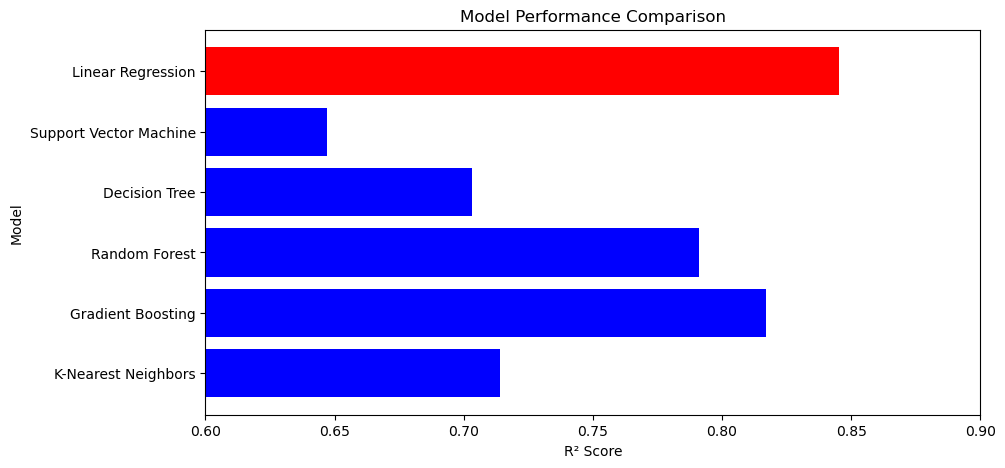

In [367]:
import matplotlib.pyplot as plt

# Model names and scores
models = ["Linear Regression", "Support Vector Machine", "Decision Tree",
          "Random Forest", "Gradient Boosting", "K-Nearest Neighbors"]
scores = [0.8452, 0.647, 0.7031, 0.791, 0.8169, 0.7141]

# Highlight the best model
best_score = max(scores)
colors = ['red' if score == best_score else 'blue' for score in scores]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(models, scores, color=colors)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.xlim(0.6, 0.9)
plt.gca().invert_yaxis()

plt.show()


In [369]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [457]:
df12.head()

,size,total_sqft,bath,price,valid,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,712.500000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,543.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,235.0,625.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,130.0,400.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,148.0,617.500000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
